#**EXPLORAÇÃO, ANÁLISE E TRATAMENTO DE DADOS: PROJETO DE PREVISÃO DE DOENÇA CARDÍACA:**

Este projeto tem como objetivo desenvolver um algoritmo de machine lernning para prever a tendência de uma pessoa em desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

Os dados foram extraídos do site Kaggle

-------------------------------------------------------------


1º passo: importar as bibliotecas numpy e pandas e carregar o dataset csv.

In [1]:
#@title
import numpy as np
import pandas as pd

dados = pd.read_csv("/content/drive/MyDrive/MACHINE_LEARNNING/heart.csv",sep=",",encoding="iso-8859-1")

Verificando a base de dados

In [2]:
#@title
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#@title
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
#@title
dados.shape

(918, 12)

#**ANALISE DE VARIÁVEIS ( TRIBUTOS )**

--------------------------------------------------------------------------------


AGE = IDADE

In [5]:
#@title
dados["Age"].value_counts()    # esse comando irá contar o quanto cada elemento ( idade ) aparece na coluna "Age"

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [6]:
#@title
dados["Age"].value_counts().sort_index()  # o comando para contar elementos repetidos na coluna Age acrescido do comando SORT_INDEX() 
                                          # coloca os dados em ordem crescente

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

IMPORTANDO A BIBLIOTECA PLOTLY 

In [7]:
#@title
import plotly.express as px

##FAZENDO UM GRAFICO COM AS IDADES

In [8]:
#@title
hist1 = px.histogram(dados,x="Age",nbins=60)
hist1.update_layout(width=800,height=500,title_text="Distribuição de Idades")
hist1.show()

##**CRIANDO O MESMO GRAFICO COM O SEABORN**

--------------------------------------------------------------------------------


IMPORTANDO E CRIANDO O GRÁFICO

In [9]:
#@title
import seaborn as sns

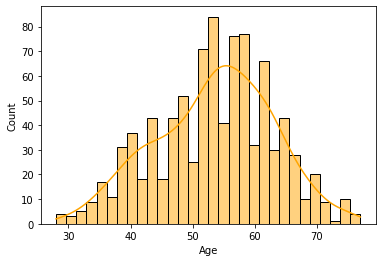

In [10]:
#@title
sns.histplot(dados,x="Age",bins=30,color="orange",kde=True,stat="count");

#**ESTUDANDO OS TIPOS DE DOR NO PEITO E SUAS CATEGORIAS**

--------------------------------------------------------------------------------

Só para lembrar que:

A coluna Idade é uma variável numérica discreta pois não existe idade fracionada, exemplo: 22.5 anos

A coluna Sexo é uma **variável categórica nominal** pois tem duas categorias ( Masculino e Feminino )

A coluna Chest Pain Type ( Tipo de dor no peito  ) é uma variável categórica pois existem categorias, a seguir:

ASY : assintomático

NAP: dor não anginosa

ATA: angina atípica

TA: angia típica

Angina = dor no peito causada pela diminuição do fluxo de sangue no coração.



In [11]:
#@title
dados["ChestPainType"].value_counts()  # retorna a quantidade total por elemento ( categoria )

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

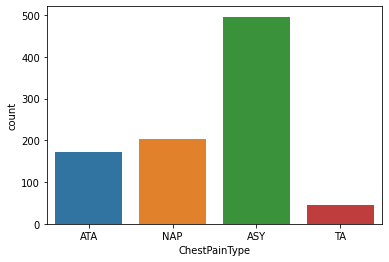

In [12]:
#@title
sns.countplot(x="ChestPainType",data=dados);

##ESTUDANDO BP ( BLOOD PRESSURE ) = PRESSÃO SANGUÍNIA EM REPOUSO EM mmHg ( SISTÓLICA )

In [13]:
#@title
dados.RestingBP.value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

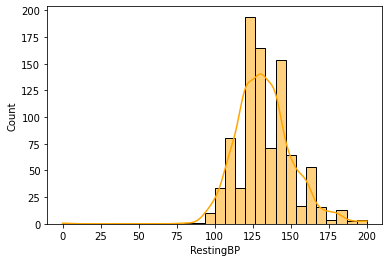

In [14]:
#@title
sns.histplot(dados, x="RestingBP", bins=30, color ="orange",kde = True,stat="count")

#ANÁLISE DE TIPOS DE ATRIBUTOS

--------------------------------------------------------------------------------


In [15]:
#@title
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos

In [16]:
#@title
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

IMPORTANTE: PARA GERAR OS ALGORITMOS O TIPO DE DADOS CATEGORICOS  DEVEM SER CONVERTIDOS PARA ORDINAIS OU NUMÉRICOS 

#VALORES MISSING ( NAN )

--------------------------------------------------------------------------------


In [17]:
#@title
# Relação de quantidade
dados.isnull().sum()   # soma por categoria ( coluna ) todos os valores nulos ( NAN )

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
#@title


IMPORTANTE
--------------------------------------------------------------------------------


* EXCLUIR VALORES MISSING ( NAN ):  dados2 = dados.dropna()    

OBS: criar um novo dataset para receber o dataset atual com os dados NAN excluidos pois mantem a integridade do dataset original.

* SUBSTITUIR OS VALORES MISSING PELA MÉDIA:  dados2 ["Age"] . fillna ( dados2["Age"].mean( ) , inplace = True )

* SUBSTITUIR OS VALORES MISSING POR QUALQUER VALOR:  dados2 ["Age"] . fillna ( 10 , inplace = True )

--------------------------------------------------------------------------------






#ANALISES ESTATISTICAS DESCRITIVAS

In [19]:
#@title
dados.describe()   # resumo estatistico descritivo usando apenas as colunas com dados numéricos

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
#@title
dados.mode()  # moda dos elementos por categoria ( coluna )

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


#TRATANDO DADOS COM VALORES INCOERENTES
--------------------------------------------------------------------------------


##EXCLUINDO REGISTROS COM PRESSÃO ZERO

In [21]:
dados2 = dados.loc[dados.RestingBP!=0]  # cria uma veriavel dados2 com todos os dados de RestingBP diferente de zero

In [22]:
dados2.shape

(917, 12)

In [23]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##ALTERANDO OS VALORES DE COLESTEROL PELA MÉDIA

In [24]:
dados2.Cholesterol.value_counts()   # contar os valores de Cholesterol. Percebe-se que o valor 0 tem 171 entradas, o que é um erro.

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [25]:
dados.Cholesterol.mean()  # calculando a média de Cholesterol, porem as entradas zeradas deturpam o calculo

198.7995642701525

In [26]:
dados2.Cholesterol.replace(0,np.NaN, inplace = True)  # altera os valores 0 para NaN ( Valores missing )

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
dados2.Cholesterol.value_counts()

254.0    11
223.0    10
220.0    10
216.0     9
230.0     9
         ..
347.0     1
365.0     1
412.0     1
491.0     1
131.0     1
Name: Cholesterol, Length: 221, dtype: int64

In [28]:
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [29]:
dados2["Cholesterol"].fillna(dados2["Cholesterol"].mean(),inplace = True)  # Substituindo os valores MISSING pela média.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [31]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


##ANALISE DE OUTLIERS ( DISCREPÂNCIAS )

________________________________________________________________________________


In [33]:
# Idade
px.box ( dados2, y = "Age")

In [34]:
# Pressão sanguinia em repouso
px.box ( dados2, y = "RestingECG")

In [35]:
# Colesterol
px.box ( dados2, y = "Cholesterol")

In [36]:
# Frequência cardiaca máxima
px.box ( dados2, y = "MaxHR")

#SALVANDO ( EXPORTANDO ) O DATAFRAME TRATADO

________________________________________________________________________________

In [37]:
dados2.to_csv("heart_tratado.csv",sep = ";", encoding = "utf-8",  index = False)

# PRÉ PROCESSAMENTO
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------


##TRANSFORMANDO AS VERIAVEIS CATEGORICAS NOMINAIS EM VARIAVEIS CATEGORICAS ORDINAIS

In [38]:
df2 = pd.DataFrame.copy(dados2) # copiando o DataFrame sem manter relacionamento entre eles

In [39]:
df2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


In [40]:
df2 ["Sex"].replace({"M":0,"F":1},inplace=True)  # altera na coluna Sex o M para 0 e o F para 1
df2["ChestPainType"].replace({"TA":0,"ATA":1,"NAP":2,"ASY":3},inplace=True)
df2["RestingECG"].replace({"Normal":0,"ST":1,"LVH":2},inplace=True)
df2["ExerciseAngina"].replace({"N":0,"Y":1},inplace=True)
df2["ST_Slope"].replace({"Up":0,"Flat":1,"Down":2},inplace=True)

In [41]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [42]:
df2.dtypes   # todas as colunas agora possuem dados numéricos int64 ou float64 ideais para o modelo

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

LEGENDA
--------------------------------------------------------------------------------

* Age = idade (anos)

* Sex = sexo (0=M; 1=F)

* Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

* Resting BP = pressão sanguínea em repouso (mmHg)

* Cholesterol = colesterol sérico (mg/dl)

* Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

* Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

* Max HR = frequência cardíaca máxima

* Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

* Old Peak = Depressão de ST induzida por exercício em relação ao repouso

* ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

* Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)


##ATRIBUTOS PREVISORES E ALVO
--------------------------------------------------------------------------------


In [43]:
df2.shape

(917, 12)

In [44]:
previsores=df2.iloc[:,0:11].values   # criando um array somente com os valores menos a ultima coluna

In [45]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [46]:
previsores.shape

(917, 11)

In [47]:
alvo = df2.iloc[:,11].values   # criando um array com os resultados alvo

In [48]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
alvo.shape

(917,)

#ANÁLISE DAS ESCALAS DOS ATRIBUTOS
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


PADRONIZAÇÃO ( utiliza a média e o desvio padrão como referência )

NORMALIZAÇÃO ( utiliza os valores máximo e mínimo como referência )

In [50]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [51]:
# importando o SKLEARN e seu subpacote StandardScaler para fazer a conversão de escalas baseado em PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

In [52]:
# Criando uma nova variavel para receber a conversão
previsores_esc = StandardScaler().fit_transform(previsores)

In [53]:
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [54]:
previsoresdf = pd.DataFrame(previsores_esc)

In [55]:
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [56]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


##CODIFICAÇÃO DE VARIAVEIS CATEGORICAS  -  JEITO MAIS FACIL

--------------------------------------------------------------------------------

LabelEncoder: transformação de variaveis categóricas em numéricas de forma mais facil 

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
previsores2 = dados2.iloc[:,0:11].values   # criando uma nova variavel para receber os dados e manter a integridade dos dados originais

In [59]:
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [60]:
# convertendo as variaveis categoricas da coluna 1 em numéricas
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[:,1]) 

In [61]:
# fazendo o mesmo com as demais colunas com variaveis categoricas nominais
previsores2[:,2] = LabelEncoder().fit_transform(previsores[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores[:,10])


In [62]:
previsores2.shape

(917, 11)

###OneHotEnconder: criação de variaveis Dummy ( ficticia )


In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
from sklearn.compose import ColumnTransformer

Parâmetros ColumnTransformer:

* name: nome dado a transformação
* transformer: tipo de estimador (OneHotEncoder)
* columns: colunas que serão transformadas
* remainder: o que acontecerá com os restantes das colunas não relacionadas:

1 - drop ( exclui as outras colunas )

2 - passthrough ( mantem as outras colunas )

Drop é Default

* sparse_threshold: parâmetro de classificação de matrizes esparsas. Default é 0.3.
* n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum.
* transformer_weights: definição de pesos aos transformadores.
* verbose: default é False. se for True a execução é apresentada na tela.

In [65]:
previsores3 = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,2,6,8,10])],remainder="passthrough").fit_transform(previsores2)

In [66]:
previsores3

array([[0.0, 1.0, 0.0, ..., 0, 172, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 156, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 115, 1.2],
       [1.0, 0.0, 0.0, ..., 0, 174, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [67]:
previsores3.shape

(917, 20)

In [68]:
previsores3df = pd.DataFrame(previsores3)

In [69]:
previsores3df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40,140,289.0,0,172,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37,130,283.0,0,98,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54,150,195.0,0,122,0.0


#ESCALONAMENTO
--------------------------------------------------------------------------------

In [70]:
previsores3_esc=StandardScaler().fit_transform(previsores3)
previsores3_esc

array([[-0.51630861,  0.51630861, -0.22981048, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -0.22981048, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -0.22981048, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861, -0.22981048, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -0.22981048, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -0.22981048, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [71]:
previsores3df=pd.DataFrame(previsores3_esc)

In [72]:
previsores3df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,-0.229810,2.073784,-0.531524,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-0.229810,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-0.869888,0.998910,-0.271607,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,-0.229810,2.073784,-0.531524,-1.085425,-1.226974,2.037569,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,-0.229810,-0.482210,-0.531524,0.921298,0.815013,-0.490781,-0.507826,-1.213136,1.213136,-0.869888,0.998910,-0.271607,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-0.229810,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,-0.516309,0.516309,4.351412,-0.482210,-0.531524,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-0.869888,0.998910,-0.271607,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,-0.516309,0.516309,-0.229810,-0.482210,-0.531524,0.921298,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-0.869888,0.998910,-0.271607,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,-0.516309,0.516309,-0.229810,-0.482210,-0.531524,0.921298,0.815013,-0.490781,-0.507826,-1.213136,1.213136,-0.869888,0.998910,-0.271607,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.936826,-1.936826,-0.229810,2.073784,-0.531524,-1.085425,-1.226974,-0.490781,1.969177,0.824310,-0.824310,-0.869888,0.998910,-0.271607,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


RESUMO DO PRE PROCESSAMENTO:
--------------------------------------------------------------------------------

* alvo : variavel que se pretende atingir ( tem ou não a doença cardiaca )
* previsores : conjunto de variaveis previsoras com as variaveis categoricas transformadas em numericas manualmente sem escalonar
* previsores_esc : conjunto de variaveis previsoras com as variaveis categoricas transformadas em numericas , escalonada.
* previsores2 : conjunto de variaveis previsoras com as variaveis categoricas transformadas em numericas pelo LabelEncoder
* previsores3 : conjunto de variaveis previsoras transformadas pelo LabelEncoder e OneHotEncoder, sem escalonar.
* previsores3_esc: conjunto de variaveis previsoras transformadas pelo LabelEncoder e OneHotEncoder escalonada.


#REDUÇÃO DE DIMENSIONALIDADE
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


oBJETIVO E SELECIONAR OS MELHORES COMPONENTES  ( ATRIBUTOS ) PARA O TREINAMENTO DE ALGORITMOS ATRAVES DA ANALISE DAS CORRELAÇÕES ENTRE VARIAVEIS.



## ANALISE DOS COMPONENTES PRINCIPAIS ( PCA )

**Seleção de características:** Seleciona os melhores atributos e utiliza sem transformação
**Extração de caracteristicas:** encontra os relacionamentos dos melhores atributos e cria novos atributos. 

É um algoritmo de aprendizagem não supervisionada. Aplica-se a dados linearmente separaveis.


In [73]:
# é o mais utilizado
from sklearn.decomposition import PCA


In [74]:
pca = PCA(n_components=8, svd_solver="arpack")

In [75]:
previsores_pca = pca.fit_transform(previsores2)

In [76]:
previsores_pca.shape

(917, 8)

## KERNEL PCA

É um algoritmo de aprendizagem não supervisionada

Aplica se tambem a dados linearmente não separaveis

In [77]:
from sklearn.decomposition import KernelPCA

In [78]:
kpca = KernelPCA(n_components=4, kernel="rbf")

In [79]:
previsores_kernel= kpca.fit_transform(previsores2)

In [80]:
previsores_kernel.shape

(917, 4)

In [81]:
previsores_kernel

array([[-0.00161313, -0.00266007, -0.00186814, -0.00263223],
       [-0.00161382, -0.00266122, -0.00186901, -0.00263352],
       [-0.0016132 , -0.00266017, -0.00186822, -0.00263235],
       ...,
       [-0.00161315, -0.00266009, -0.00186816, -0.00263225],
       [-0.00161325, -0.00266026, -0.00186829, -0.00263245],
       [-0.00161314, -0.00266007, -0.00186814, -0.00263224]])

## Analise do Discrimante Linear ( LDA : Linear Discriminat Analysis )

Algoritmo de aprendizagem supervisionada pois utiliza a classe como referencia para seleção. 

*Aplicado em situações com muitos atributos previsores e tambem com o atributo alvo de muitas classes.* ❎

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [83]:
lda = LinearDiscriminantAnalysis(n_components=1)


In [84]:
previsores_lda = lda.fit_transform(previsores2, alvo)

In [85]:
previsores_lda

array([[-1.84039906e+00],
       [-1.02850026e+00],
       [-1.31942421e+00],
       [ 5.44796136e-01],
       [-1.07056148e+00],
       [-1.33498689e+00],
       [-2.65709986e+00],
       [-1.71006712e+00],
       [ 1.05406169e+00],
       [-2.19691693e+00],
       [-2.10336229e+00],
       [ 5.60819162e-01],
       [-1.82642106e+00],
       [ 1.02429254e+00],
       [-2.04219711e+00],
       [-1.21482688e+00],
       [-2.02616486e-01],
       [-2.71291883e+00],
       [ 4.99934678e-01],
       [-4.11374508e-01],
       [-2.98063459e+00],
       [-7.04338045e-01],
       [-2.65710181e+00],
       [ 4.75746736e-01],
       [-1.28657725e+00],
       [-1.62448979e+00],
       [ 1.63352464e+00],
       [-1.39514243e+00],
       [-1.90715060e+00],
       [-1.76263888e+00],
       [ 3.45010914e-01],
       [-1.07924898e+00],
       [ 6.51134898e-01],
       [ 4.33824846e-01],
       [-2.60569643e+00],
       [-1.85455855e+00],
       [ 2.39630035e+00],
       [-2.47176887e+00],
       [-1.9

# SALVANDO AS VARIÁVEIS ( atributos )
--------------------------------------------------------------------------------

In [86]:
import pickle

In [87]:
# criando arquivo
arq1 = open("heart.pk1","wb")  # quando cria "wb", quando lê o arquivo "rb"

In [88]:
# salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [89]:
# fechar arquivo
arq1.close()

In [90]:
# lendo o arquivo
arq1 = open("heart.pk1","rb")

In [91]:
# chamando a variável
alvo = pickle.load(arq1)

In [92]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# SEPARANDO BASE DE TREINO E TESTE
--------------------------------------------------------------------------------


In [93]:
from sklearn.model_selection import train_test_split

Parâmetros do Train_Test_Split:
* arrays : nomes dos atributos previsores e alvo
* test_size : tamanho em porcentagem dos dados de teste. Default é none.
* train_size : tamanho em porcentagem dos dados de treinamento. Default é none.
* randon_state : nomeação de um estado aleatório
* shuffle : embaralhamento dos dados aleatórios. Associado com random _state ocorre o mesmo embaralhamento sempre. Default é True.
* stratify : possibilidade de dividir os dados de forma estratificada. Default é none. ( Nesse caso é mantida a proporção, isto é, se tem 30% de zeros e 70% de 1 no DataFrame, na separação em treinamento e teste se manterá essa proporção ).


In [94]:
# x_treino,x_teste,y_treino,y_teste = train_test_split(previsores3_esc,alvo,test_size=0.3,random_state=0)

In [95]:
x_treino,x_teste,y_treino,y_teste = train_test_split(previsores ,alvo,test_size=0.3,random_state=0)

In [96]:
x_treino.shape

(641, 11)

In [97]:
x_teste.shape

(276, 11)

In [98]:
y_teste.shape

(276,)

# NAIVE BAYES
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [163]:
# Treinamento do algotitmo
from sklearn.naive_bayes import GaussianNB

In [164]:
naive = GaussianNB()

In [165]:
naive.fit(x_treino,y_treino)

GaussianNB()

In [166]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [167]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [168]:
accuracy_score(y_teste, previsoes_naive)

0.8442028985507246

In [169]:
confusion_matrix(y_teste,previsoes_naive)

array([[102,  19],
       [ 24, 131]])

In [170]:
print(classification_report(y_teste,previsoes_naive))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



Analise de dados treino

In [171]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [172]:
accuracy_score(y_treino,previsoes_treino)

0.8361934477379095

In [173]:
confusion_matrix(y_treino,previsoes_treino)

array([[243,  46],
       [ 59, 293]])

### Validação cruzada

In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [175]:
# separando os dados em Folds
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [176]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo,previsores3_esc,alvo,cv=kfold)


In [177]:
resultado

array([0.87096774, 0.87096774, 0.90322581, 0.80645161, 0.77419355,
       0.90322581, 0.70967742, 0.87096774, 0.77419355, 0.87096774,
       0.90322581, 0.77419355, 0.93548387, 0.90322581, 0.87096774,
       0.87096774, 0.87096774, 0.93333333, 0.93333333, 0.9       ,
       0.76666667, 0.83333333, 0.8       , 0.7       , 0.83333333,
       0.93333333, 0.86666667, 0.9       , 0.86666667, 0.8       ])

In [178]:
# Usando a média e desvio padrão

In [179]:
print("Acurácia Média: %.2f%%" %(resultado.mean()*100))

Acurácia Média: 85.17%


# MAQUNA DE VETOR DE SUPORTE SVM
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [180]:
from sklearn.svm import SVC   # Importando a biblioteca SVM especifico para classificação ( SVC )

In [181]:
svm = SVC(kernel='rbf',random_state=1, C=2) # Cria o vetor "svm". A configuração kernel para transformar os dados para aplicação da forma correta
svm.fit(x_treino, y_treino)  # Criação do fit de treinamento

SVC(C=2, random_state=1)

In [182]:
previsoes_svm=svm.predict(x_teste)   # Criação do PREVISOR baseado no svm
previsoes_svm # Visualiza o resultado

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [183]:
y_teste # Visualiza a base y de teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [184]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm)*100.0))

Acurácia: 67.03%


In [185]:
confusion_matrix(y_teste, previsoes_svm)

array([[ 68,  53],
       [ 38, 117]])

In [186]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       121
           1       0.69      0.75      0.72       155

    accuracy                           0.67       276
   macro avg       0.66      0.66      0.66       276
weighted avg       0.67      0.67      0.67       276



## Analise dados de treino
--------------------------------------------------------------------------------


In [187]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,

In [188]:
accuracy_score(y_treino, previsoes_treino)
confusion_matrix(y_treino,previsoes_treino)

array([[181, 108],
       [ 75, 277]])

## Validação Cruzada
--------------------------------------------------------------------------------


In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
# separando os dados em Folds
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [191]:
#Criando o modelo
modelo=SVC(kernel="rbf",random_state=1,C=2.0)
resultado=cross_val_score(modelo, previsores3_esc,alvo,cv=kfold)

In [192]:
# Usando a média e o desvio padrão
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

 A Acurácia Média: 85.72%


# REGRESSÃO LOGISTICA
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [193]:
from sklearn.model_selection import train_test_split

### Parâmetros do train_test_split
-----------------------------------

arrays: nome dos atributos previsores e alvo

test_size: tamanho em porcentagem dos dados de teste. Default é none.

train_size: tamanho em porcentagem dos dados de treino. Default é none.

randon_state : nomeação de um estado aleatório

shufle: embaralhamento dos dados aleatórios. Associado com random_state ocorre o mesmo embaralhamento sempre.

stratify : possibilidade de dividir os dados de forma estratificada. Default é none( nesse caso é manttida a proporção )

In [194]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size=0.3, random_state=0)

In [195]:
x_treino.shape

(641, 11)

In [196]:
y_treino.shape

(641,)

In [197]:
from sklearn.linear_model import LogisticRegression   # Importando biblioteca LogisticRegression

In [198]:
logistica = LogisticRegression(random_state=1,max_iter=200, penalty="l2", tol=0.0001,C=1,solver="lbfgs")
logistica.fit(x_treino,y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=200, random_state=1)

In [199]:
logistica.intercept_  # Verifica o resultado do Intercepto

array([-0.38252081])

In [200]:
logistica.coef_  # Verifica o resultado dos coefientes

array([[-0.00288297, -1.26887413,  0.58309009, -0.00254355,  0.00334229,
         0.97794865,  0.18613216, -0.01884256,  1.02840587,  0.26422546,
         1.56839988]])

In [201]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [202]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste,previsoes_logistica)*100))

Acurácia: 85.14%


In [203]:
confusion_matrix(y_teste,previsoes_logistica)

array([[ 97,  24],
       [ 17, 138]])

In [204]:
print(classification_report(y_teste,previsoes_logistica))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       121
           1       0.85      0.89      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



## Analise dados de treino

In [205]:
previsoes_treino= logistica.predict(x_treino)   # Criando Dataframe para receber dados treino
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [206]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino,previsoes_treino)*100))   # Verifica a acurácio da base treino

Acurácia: 85.49%


In [207]:
confusion_matrix(y_treino,previsoes_treino)

array([[238,  51],
       [ 42, 310]])

In [208]:
print(classification_report(y_treino,previsoes_treino))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       289
           1       0.86      0.88      0.87       352

    accuracy                           0.85       641
   macro avg       0.85      0.85      0.85       641
weighted avg       0.85      0.85      0.85       641



## Validação Cruzada

In [209]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [210]:
# separando os dados em Folds
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [211]:
#Criando o modelo
modelo=LogisticRegression(random_state=1,max_iter=200, penalty="l2", tol=0.0001,C=1,solver="lbfgs")
resultado=cross_val_score(modelo, previsores3_esc,alvo,cv=kfold)

In [212]:
# Usando a média e o desvio padrão
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

 A Acurácia Média: 85.83%


# K NN
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [213]:
from sklearn.neighbors import KNeighborsClassifier   # Importando a biblioteca

In [214]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2,)  #configurando o KNN
knn.fit(x_treino,y_treino)   # Criando o modelo de treino

KNeighborsClassifier()

In [215]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [216]:
print("Acuracia: %.2f%%" % (accuracy_score(y_teste,previsoes_knn)*100))

Acuracia: 65.58%


In [217]:
confusion_matrix(y_teste,previsoes_knn)

array([[ 71,  50],
       [ 45, 110]])

In [218]:
    print(classification_report(y_teste,previsoes_knn))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       121
           1       0.69      0.71      0.70       155

    accuracy                           0.66       276
   macro avg       0.65      0.65      0.65       276
weighted avg       0.65      0.66      0.65       276



## Analise do treino

In [219]:
previsoes_treino= knn.predict(x_treino)   # Criando Dataframe para receber dados treino
previsoes_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [220]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino,previsoes_treino)*100))   # Verifica a acurácio da base treino

Acurácia: 79.10%


In [221]:
confusion_matrix(y_teste,previsoes_knn)

array([[ 71,  50],
       [ 45, 110]])

In [222]:
print(classification_report(y_teste,previsoes_knn))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       121
           1       0.69      0.71      0.70       155

    accuracy                           0.66       276
   macro avg       0.65      0.65      0.65       276
weighted avg       0.65      0.66      0.65       276



## Validação cruzada

In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [224]:
# separando os dados em Folds
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [225]:
#Criando o modelo
modelo=KNeighborsClassifier(n_neighbors=7, metric='minkowski',p=1)
resultado=cross_val_score(modelo, previsores3_esc,alvo,cv=kfold)

In [226]:
# Usando a média e o desvio padrão
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

 A Acurácia Média: 85.84%


# ARVORE DE DECISÃO
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [227]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
arvore = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [229]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [230]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [231]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste,previsoes_arvore)*100))

Acurácia: 83.70%


In [232]:
confusion_matrix(y_teste,previsoes_arvore)

array([[105,  16],
       [ 29, 126]])

In [233]:
print(classification_report(y_teste,previsoes_arvore))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       121
           1       0.89      0.81      0.85       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



## Analise de treino

In [234]:
previsoes_treino=arvore.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [235]:
accuracy_score(y_treino,previsoes_treino)

0.8517940717628705

In [236]:
confusion_matrix(y_treino,previsoes_treino)

array([[249,  40],
       [ 55, 297]])

## VALIDAÇÃO CRUZADA
--------------------------------------------------------------------------------


In [237]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [238]:
# separando os dados em Folds
kfold = KFold(n_splits=30, shuffle=True, random_state=5)

In [239]:
#Criando o modelo
modelo=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
resultado=cross_val_score(modelo, previsores3_esc,alvo,cv=kfold)

In [240]:
# Usando a média e o desvio padrão
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

 A Acurácia Média: 83.32%


# XGBOOST
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [241]:
from xgboost import XGBClassifier

In [242]:
xg=XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=200,objective='binary:logistic',random_state=3)
xg.fit(x_treino, y_treino)

XGBClassifier(max_depth=2, n_estimators=200, random_state=3)

In [243]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg 

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [244]:
print ('Acurácia: %.2f%%' % (accuracy_score(y_teste,previsoes_xg)*100))

Acurácia: 86.59%


In [245]:
confusion_matrix(y_teste,previsoes_xg)

array([[103,  18],
       [ 19, 136]])

In [246]:
print(classification_report(y_teste,previsoes_xg))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



## Analise de treino
--------------------------------------------------------------------------------


In [247]:
previsoes_treino=xg.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [248]:
print ('Acurácia: %.2f%%' % (accuracy_score(y_treino,previsoes_treino)*100))

Acurácia: 92.04%


In [249]:
confusion_matrix(y_treino,previsoes_treino)

array([[256,  33],
       [ 18, 334]])

In [250]:
print(classification_report(y_treino,previsoes_treino))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       289
           1       0.91      0.95      0.93       352

    accuracy                           0.92       641
   macro avg       0.92      0.92      0.92       641
weighted avg       0.92      0.92      0.92       641



## Validação cruzada

In [251]:
from sklearn.model_selection import KFold		
from sklearn.model_selection import cross_val_score		
kfold = KFold(n_splits=30, shuffle=True, random_state=5)		
modelo=XGBClassifier(max_depth=2,learning_rate=0.05,n_estimators=250,objective='binary:logistic',random_state=3)		
resultado=cross_val_score(modelo, previsores,alvo,cv=kfold)		
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))		

 A Acurácia Média: 87.13%


# CATBOOST
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [252]:
# iNSTALAÇÃO
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [253]:
from catboost import CatBoostClassifier

In [254]:
dados2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [255]:
previsores4= dados2.iloc[:,0:11]

In [256]:
alvo4= dados2.iloc[:,11]

In [257]:
alvo4.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [258]:
previsores4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up


In [259]:
from sklearn.model_selection import train_test_split

In [260]:
x_treino,x_teste,y_treino,y_teste = train_test_split(previsores4,alvo4,test_size=0.3,random_state=0)

In [261]:
categoricas=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [262]:
catboost= CatBoostClassifier(task_type='CPU',iterations=120, learning_rate=0.1,depth=8,random_state=5,eval_metric='Accuracy')

In [263]:
catboost.fit(x_treino,y_treino,cat_features=categoricas,plot=True,eval_set=(x_teste,y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8861154	test: 0.7789855	best: 0.7789855 (0)	total: 53.7ms	remaining: 6.39s
1:	learn: 0.8689548	test: 0.7934783	best: 0.7934783 (1)	total: 58.4ms	remaining: 3.44s
2:	learn: 0.8471139	test: 0.7971014	best: 0.7971014 (2)	total: 60.4ms	remaining: 2.36s
3:	learn: 0.8549142	test: 0.8043478	best: 0.8043478 (3)	total: 64ms	remaining: 1.85s
4:	learn: 0.8517941	test: 0.8043478	best: 0.8043478 (3)	total: 67.8ms	remaining: 1.56s
5:	learn: 0.8486739	test: 0.8043478	best: 0.8043478 (3)	total: 71.4ms	remaining: 1.36s
6:	learn: 0.8580343	test: 0.8115942	best: 0.8115942 (6)	total: 75.1ms	remaining: 1.21s
7:	learn: 0.8642746	test: 0.8043478	best: 0.8115942 (6)	total: 78.8ms	remaining: 1.1s
8:	learn: 0.8533541	test: 0.8043478	best: 0.8115942 (6)	total: 82.5ms	remaining: 1.02s
9:	learn: 0.8611544	test: 0.8115942	best: 0.8115942 (6)	total: 86.2ms	remaining: 948ms
10:	learn: 0.8642746	test: 0.8079710	best: 0.8115942 (6)	total: 89.7ms	remaining: 889ms
11:	learn: 0.8658346	test: 0.8043478	best: 0.

In [264]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [265]:
print ('Acurácia: %.2f%%' % (accuracy_score(y_teste,previsoes_cat)*100))

Acurácia: 86.96%


In [266]:
confusion_matrix(y_teste,previsoes_cat)

array([[103,  18],
       [ 18, 137]])

## Analise dados Treino

In [267]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [268]:
print ('Acurácia: %.2f%%' % (accuracy_score(y_treino,previsoes_treino)*100))

Acurácia: 91.73%


In [269]:
confusion_matrix(y_treino,previsoes_treino)

array([[255,  34],
       [ 19, 333]])

## VALIDAÇÃO CRUZADA
--------------------------------------------------------------------------------


In [270]:
from sklearn.model_selection import KFold		
from sklearn.model_selection import cross_val_score		
kfold = KFold(n_splits=30, shuffle=True, random_state=5)		
modelo=CatBoostClassifier(task_type='CPU',iterations=100, learning_rate=0.1,depth=8,random_state=8,eval_metric='Accuracy')		
resultado=cross_val_score(modelo, previsores,alvo,cv=kfold)		
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

0:	learn: 0.8769752	total: 10.1ms	remaining: 995ms
1:	learn: 0.8544018	total: 10.9ms	remaining: 532ms
2:	learn: 0.8623025	total: 13.8ms	remaining: 447ms
3:	learn: 0.8668172	total: 16.4ms	remaining: 395ms
4:	learn: 0.8735892	total: 18.7ms	remaining: 355ms
5:	learn: 0.8735892	total: 21ms	remaining: 329ms
6:	learn: 0.8826185	total: 23.4ms	remaining: 310ms
7:	learn: 0.8803612	total: 25.7ms	remaining: 296ms
8:	learn: 0.8803612	total: 28.1ms	remaining: 284ms
9:	learn: 0.8814898	total: 30.3ms	remaining: 272ms
10:	learn: 0.8871332	total: 32.8ms	remaining: 265ms
11:	learn: 0.8871332	total: 35.3ms	remaining: 259ms
12:	learn: 0.8882619	total: 38.2ms	remaining: 255ms
13:	learn: 0.8950339	total: 40.7ms	remaining: 250ms
14:	learn: 0.8905192	total: 44.2ms	remaining: 250ms
15:	learn: 0.8916479	total: 46.9ms	remaining: 246ms
16:	learn: 0.8916479	total: 49.6ms	remaining: 242ms
17:	learn: 0.8961625	total: 52.3ms	remaining: 238ms
18:	learn: 0.8927765	total: 55.2ms	remaining: 236ms
19:	learn: 0.8961625	tot

In [271]:
print(" A Acurácia Média: %.2f%%" % (resultado.mean()*100))

 A Acurácia Média: 87.46%


# SALVANDO DADOS PARA O DEPLOY
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


## É preciso identificar o melhor modelo e separar o melhor previsor e alvo para salvar em arquivo csv 

In [272]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [273]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [274]:
np.savetxt('previsores.csv', previsores, delimiter=',')

In [275]:
np.savetxt('alvo.csv', alvo, delimiter=',')